## Import Libraries and Load Data

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

from sklearn.datasets import load_iris

In [26]:
data = load_iris()

print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The Iris data is in a dictionary form. The key `data` has 150×4 rows of numerical values. `targe` is the class, `target_names` are the class names, and `feature_names` are the feature names. `frame` is a full pandas DataFrame, similar to what we created manually. `filename` is the path to the raw CSV or dataset file inside scikit-learn.

## Exploratory Data Analysis

In [27]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

target_dict = dict(zip([0,1,2], data.target_names))
print(f"Target classes: {target_dict}")
df['target_species'] = df['target'].map(target_dict)
df.head()

Target classes: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
df.shape

(150, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_species     150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


### Let's visualize the dataset

c:\Users\rk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


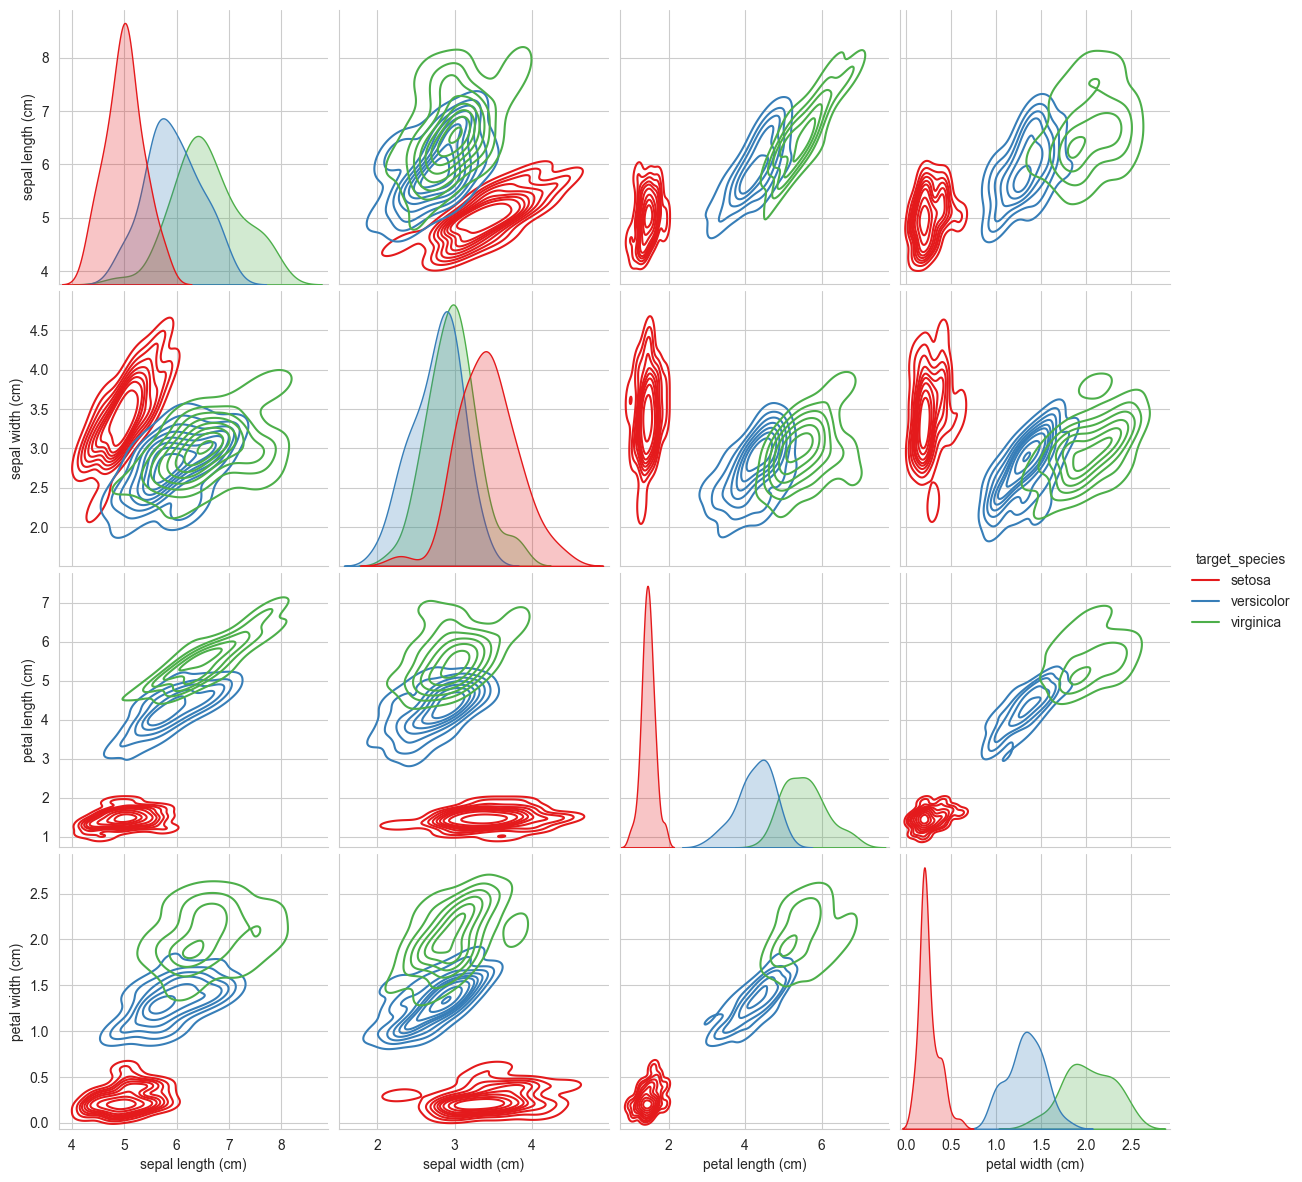

In [ ]:
vdf = df.drop(columns='target') # Let's drop target for visualizations

sns.set_style("whitegrid")
sns.pairplot(vdf,hue="target_species",size=3,aspect=1)
plt.show()

- From the above visualization, we can see that `setosa` is clearly separated from other two flowers
- And `virginia` is the longest and `setosa` is the smallest

### Now lets plot the average feature of each species

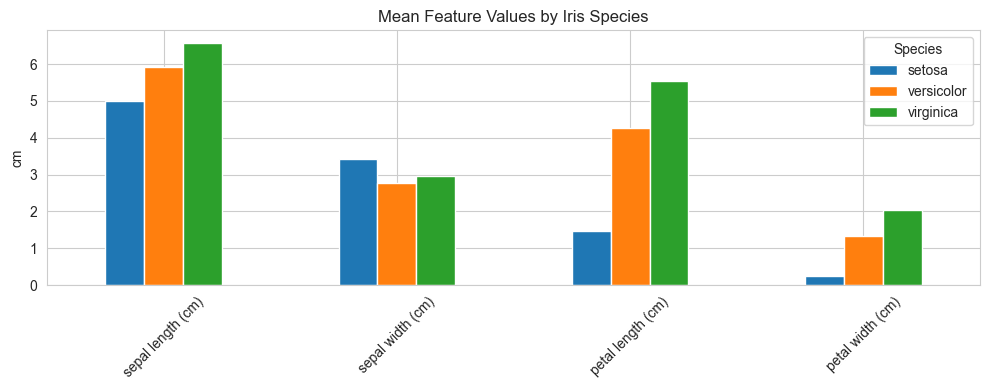

In [54]:
# Bar plot 

mean = vdf.groupby('target_species').mean(numeric_only=True) 

mean.T.plot(kind='bar', figsize=(10, 4))
plt.title('Mean Feature Values by Iris Species')
plt.ylabel('cm')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.tight_layout()
plt.show()


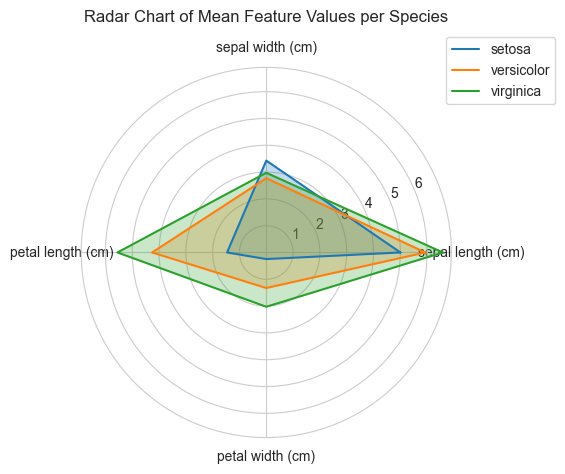

In [55]:
# Radar Plot

labels = mean.columns.tolist()
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, row in mean.iterrows():
    values = row.tolist()
    values += values[:1]  
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Mean Feature Values per Species', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
